<a href="https://colab.research.google.com/github/abhimanyuagarwal2/Time-Series-Project/blob/main/Time_Series_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment Setup

In [ ]:
!apt-get install r-base
!pip install arch
!R -e "install.packages('TSA', repos='http://cran.r-project.org')"

In [ ]:
!pip install yfinance
!pip install yahoofinancials
!pip install statsmodels

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
from yahoofinancials import YahooFinancials
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from arch import arch_model
import scipy.stats as stats
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns

In [ ]:
ticker_symbol = 'BAYRY'
start_date = '2012-01-01'
end_date = '2014-01-01'
bayer_data = yf.download(ticker_symbol, start=start_date, end=end_date)
bayer_data.to_csv("Bayer_Stock.csv")

[*********************100%%**********************]  1 of 1 completed


# Non Seasonal


## Introduction

For non-seasonal Data, I choose the daily stock closing price for Bayer Corp. from 2012 to 2014. I am getting the data from Yahoo Finance. We will be reading the data, plotting the time series, make the data stationary and then try with different models to find the best model before forcasting.


## Reading Data

We are storing our Data directly from Yahoo Finance and saving it in the variable closing _price

In [ ]:
closing_price = bayer_data['Close']
date = closing_price.index

## Plot (2012-2014) series

### Time Series Plot

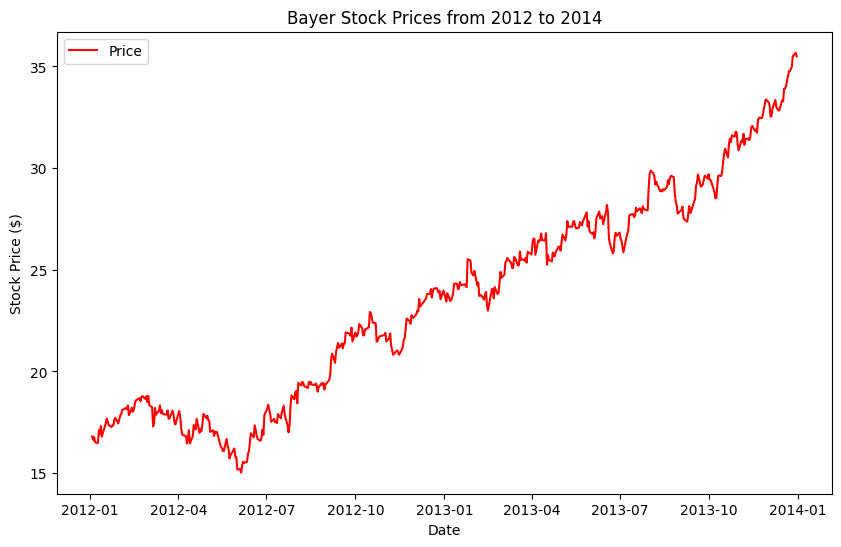

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(date, closing_price, label='Price', color='Red')
plt.title('Bayer Stock Prices from 2012 to 2014')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.show()

The Time series plot shows that there might be some unwanted variance after 2019. We will be doing some extra analysis from 2012-2019 also to confirm our hypothesis.

### ACF and PACF Plots

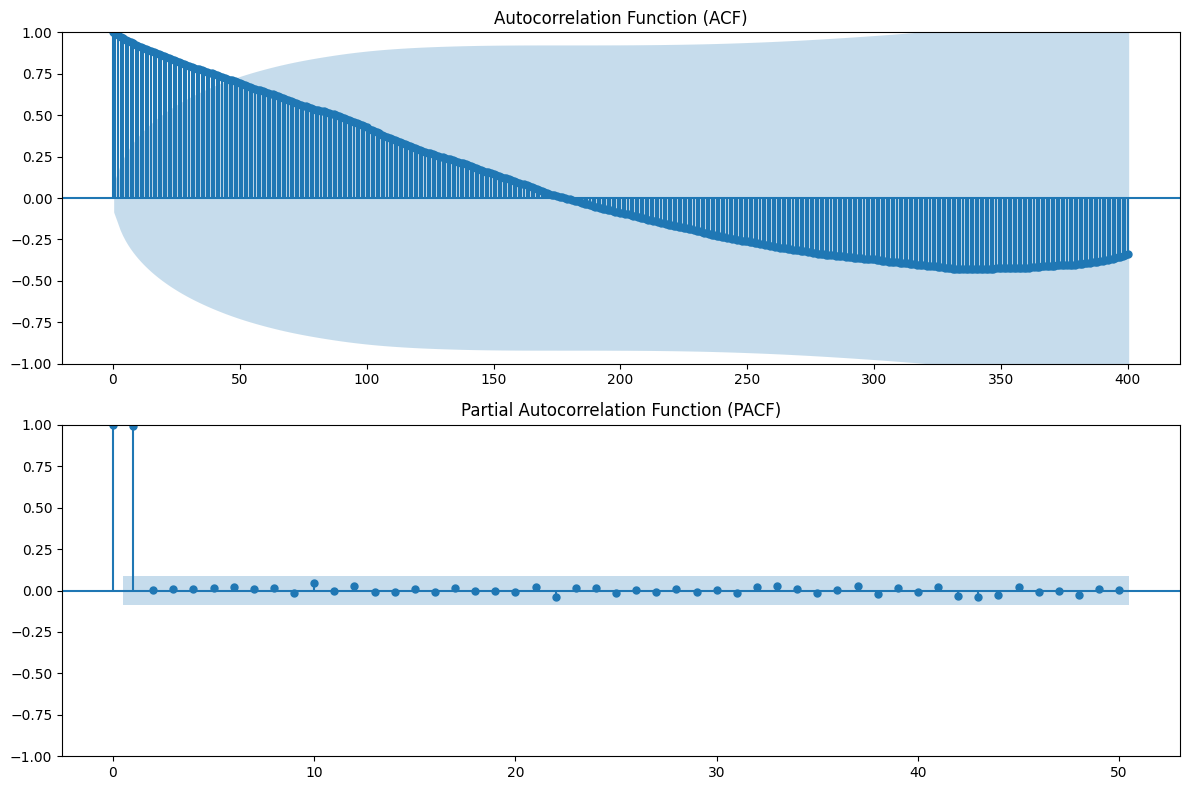

In [ ]:
# Now Plotting the ACF plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
sm.graphics.tsa.plot_acf(closing_price, lags=400, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

# PACF plot

sm.graphics.tsa.plot_pacf(closing_price, lags=50, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

1.   We can see that the ACF plot has a gradual decay over lags.
2.   The PACF plot clearly shows that lag 1 is significant.

We will now perform the ADF test to verify if our data is stationary or not.


## Augmented Dickey Fuller Test (2012-2014) series

In [ ]:
result = adfuller(closing_price)

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: 0.6473990553621518
p-value: 0.9887274939588693
Critical Values:
   1%: -3.443496379464
   5%: -2.8673378563200003
   10%: -2.569858036


From ADF test we can clearly say that the given time series is not stationary as the p-value >0.05 i.e we reject the null hypothesis.

H_0 = The Time Series is statonary

H_1 = Time Series is not stationary



## Differencing (2012-2014) data

To Make the Time Series Stationary, below are different methods.



1.   **De-trending:** We are not doing detrending because our TS doesn't show any significant trend.
2.   **Differencing:** We will perform differencing on our data to make it stationary.
3.   **Transformation:** We will try different transformation method like log transformation etc. if differencing doesn't work.

In [ ]:
first_order_diff = closing_price.diff().dropna()

Date
2012-01-03    16.799999
2012-01-04    16.642500
2012-01-05    16.775000
2012-01-06    16.520000
2012-01-09    16.475000
                ...    
2013-12-24    34.777500
2013-12-26    34.987499
2013-12-27    35.500000
2013-12-30    35.674999
2013-12-31    35.500000
Name: Close, Length: 502, dtype: float64
Date
2012-01-04   -0.157499
2012-01-05    0.132500
2012-01-06   -0.254999
2012-01-09   -0.045000
2012-01-10    0.635000
                ...   
2013-12-24    0.009998
2013-12-26    0.209999
2013-12-27    0.512501
2013-12-30    0.174999
2013-12-31   -0.174999
Name: Close, Length: 501, dtype: float64


### Augmented Dickey Fuller Test (2012-2014) $1^{st}$ differenced data

In [ ]:
result = adfuller(first_order_diff)

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -24.763651344802756
p-value: 0.0
Critical Values:
   1%: -3.443496379464
   5%: -2.8673378563200003
   10%: -2.569858036


From ADF test we can clearly say that the given time series is stationary now the p-value >0.05 i.e we accept the null hypothesis.

H_0 = The Time Series is stationary

H_1 = Time Series is not stationary


## Plots (2012-2014)

### Time Series plot for $1^{st}$ Differenced Data


Plotting the Time Series with the Differenced Data

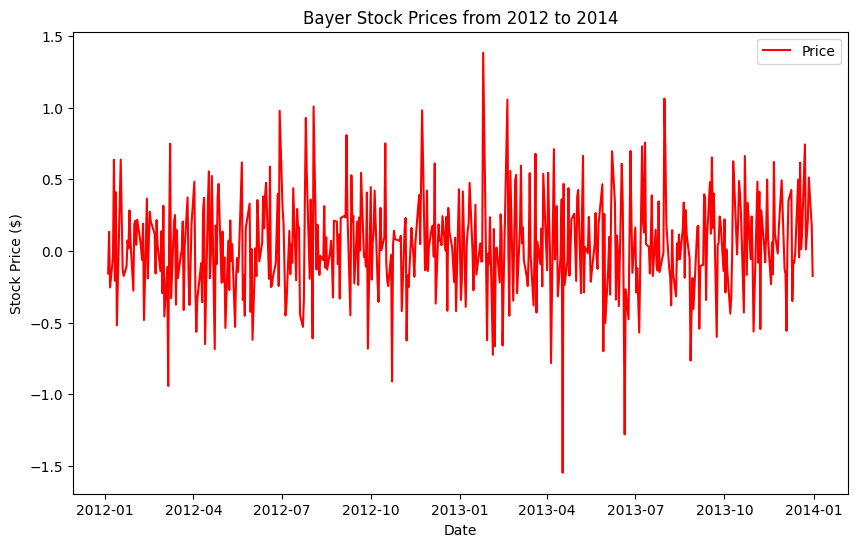

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(date[1:], first_order_diff, label='Price', color='Red')
plt.title('Bayer Stock Prices from 2012 to 2014')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.show()

### ACF and PACF plot for $1^{st}$ Differenced Data

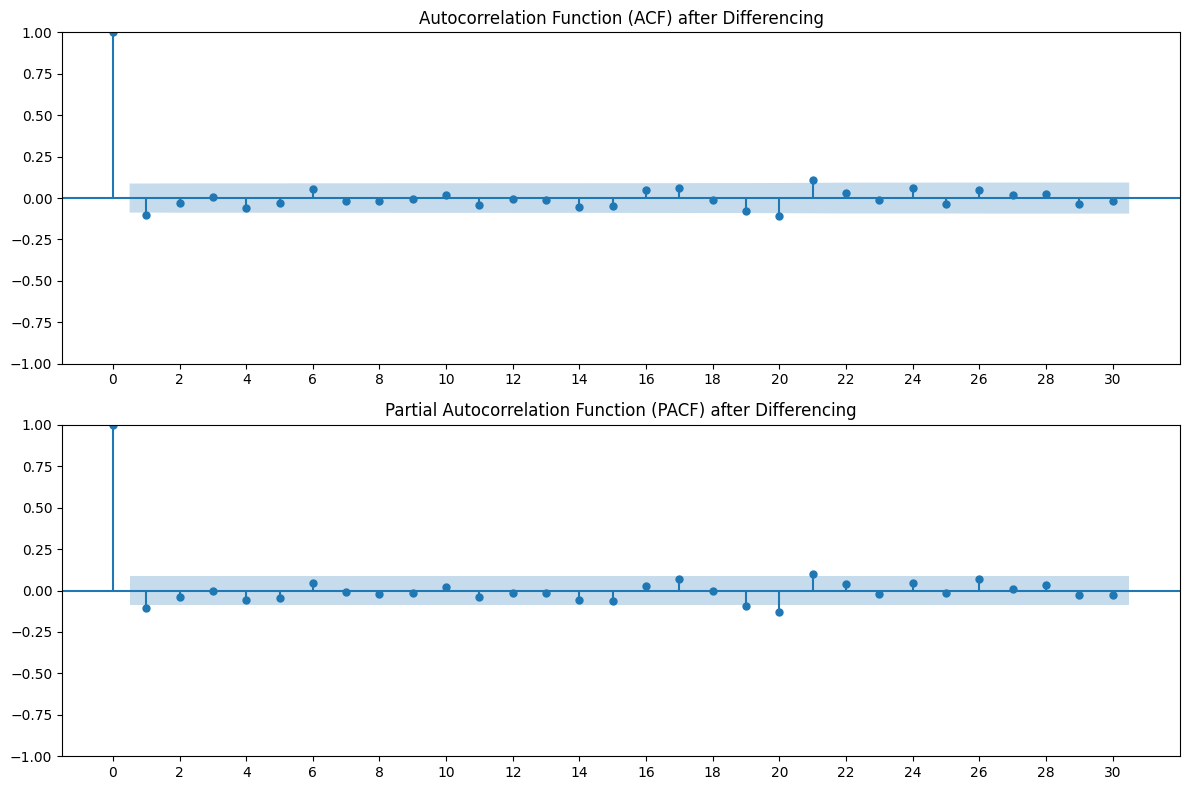

In [ ]:
# Now Plotting the ACF plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
sm.graphics.tsa.plot_acf(first_order_diff, lags=30, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF) after Differencing')
ax1.set_xticks(range(0, 31, 2))
# PACF plot

sm.graphics.tsa.plot_pacf(first_order_diff, lags=30, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF) after Differencing')
ax2.set_xticks(range(0, 31, 2))
plt.tight_layout()
plt.show()

The ACF plot clearly shows that the $1^{st}$ lag is significant. The PACF also confirms that the $1^{st}$ lag is significant.

So we have IMA(1,1), ARIMA(1,1,1) as potential models for our data

In [ ]:
first_order_diff.to_csv('data.csv', index=False)

### EACF plot

In [ ]:
!Rscript eacf.R


Attaching package: ‘TSA’

The following objects are masked from ‘package:stats’:

    acf, arima

The following object is masked from ‘package:utils’:

    tar

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x o o o o o o o o o o  o  o  o 
1 x o o o o o o o o o o  o  o  o 
2 o o o o o o o o o o o  o  o  o 
3 o x x o o o o o o o o  o  o  o 
4 x x x o o o o o o o o  o  o  o 
5 x x o x x o o o o o o  o  o  o 
6 x x o x x o o o o o o  o  o  o 
7 x x x x o x o o o o o  o  o  o 


Even the EACF plot confirm our assumption of either having a IMA(1,1) or ARIMA(1,1,1) model. It also infers that ARIMA(1,1,2) and ARIMA(2,1,2) might be other potential models.

## IMA(1,1)

In [ ]:
model_results = []
model_111 = ARIMA(first_order_diff, order=(0, 0, 1))
fit_111 = model_111.fit()
model_results.append({'Model': 'IMA(0,1)', 'AIC': fit_111.aic})
print(fit_111.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  501
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -181.534
Date:                Mon, 18 Dec 2023   AIC                            369.069
Time:                        03:29:39   BIC                            381.719
Sample:                             0   HQIC                           374.032
                                - 501                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0374      0.014      2.710      0.007       0.010       0.064
ma.L1         -0.1116      0.046     -2.442      0.015      -0.201      -0.022
sigma2         0.1208      0.006     20.410      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


## ARIMA(1,1,2)

In [ ]:
model_111 = ARIMA(first_order_diff, order=(1, 0, 2))
fit_111 = model_111.fit()
model_results.append({'Model': 'ARIMA(1,0,2)', 'AIC': fit_111.aic})
print(fit_111.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  501
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -180.472
Date:                Mon, 18 Dec 2023   AIC                            370.943
Time:                        03:29:40   BIC                            392.026
Sample:                             0   HQIC                           379.215
                                - 501                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0365      0.010      3.588      0.000       0.017       0.056
ar.L1          0.8864      0.139      6.399      0.000       0.615       1.158
ma.L1         -0.9984      0.145     -6.866      0.0

## ARIMA(2,1,2)

In [ ]:
model_111 = ARIMA(first_order_diff, order=(2, 0, 2))
fit_111 = model_111.fit()
model_results.append({'Model': 'ARIMA(2,0,2)', 'AIC': fit_111.aic})
print(fit_111.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  501
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -180.468
Date:                Mon, 18 Dec 2023   AIC                            372.935
Time:                        03:29:41   BIC                            398.235
Sample:                             0   HQIC                           382.862
                                - 501                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0365      0.010      3.575      0.000       0.016       0.057
ar.L1          0.9395      0.866      1.085      0.278      -0.757       2.636
ar.L2         -0.0440      0.674     -0.065      0.9

## ARIMA(1,1,1)

In [ ]:
model_111 = ARIMA(first_order_diff, order=(1, 0, 1))
fit_111 = model_111.fit()
model_results.append({'Model': 'ARIMA(1,0,1)', 'AIC': fit_111.aic})
print(fit_111.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  501
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -181.083
Date:                Mon, 18 Dec 2023   AIC                            370.165
Time:                        03:29:41   BIC                            387.032
Sample:                             0   HQIC                           376.783
                                - 501                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0374      0.013      2.987      0.003       0.013       0.062
ar.L1          0.4801      0.266      1.806      0.071      -0.041       1.001
ma.L1         -0.5820      0.247     -2.354      0.0

In [ ]:
results_df = pd.DataFrame(model_results)
sorted_results_df = results_df.sort_values(by='AIC')
print(sorted_results_df)

          Model         AIC
0      IMA(0,1)  369.068899
3  ARIMA(1,0,1)  370.165430
1  ARIMA(1,0,2)  370.943206
2  ARIMA(2,0,2)  372.935223


From the AIC values, we can conclude that **IMA(1,1) is the best model**. As after that, when we keep on increasing the conplexity, the AIC values keep on increasing.



## Diagnotics IMA(1,1) model

### Residual Plot

In [ ]:
model_results = []
model_111 = ARIMA(first_order_diff, order=(0, 0, 1))
fit_111 = model_111.fit()
model_results.append({'Model': 'IMA(0,1)', 'AIC': fit_111.aic})

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Date
2012-01-04   -0.194904
2012-01-05    0.073615
2012-01-06   -0.284191
2012-01-09   -0.114114
2012-01-10    0.584863
                ...   
2013-12-24    0.052256
2013-12-26    0.178425
2013-12-27    0.495004
2013-12-30    0.192826
2013-12-31   -0.190889
Length: 501, dtype: float64


Date
2012-01-04   -0.194904
2012-01-05    0.073615
2012-01-06   -0.284191
2012-01-09   -0.114114
2012-01-10    0.584863
                ...   
2013-12-24    0.052256
2013-12-26    0.178425
2013-12-27    0.495004
2013-12-30    0.192826
2013-12-31   -0.190889
Length: 501, dtype: float64


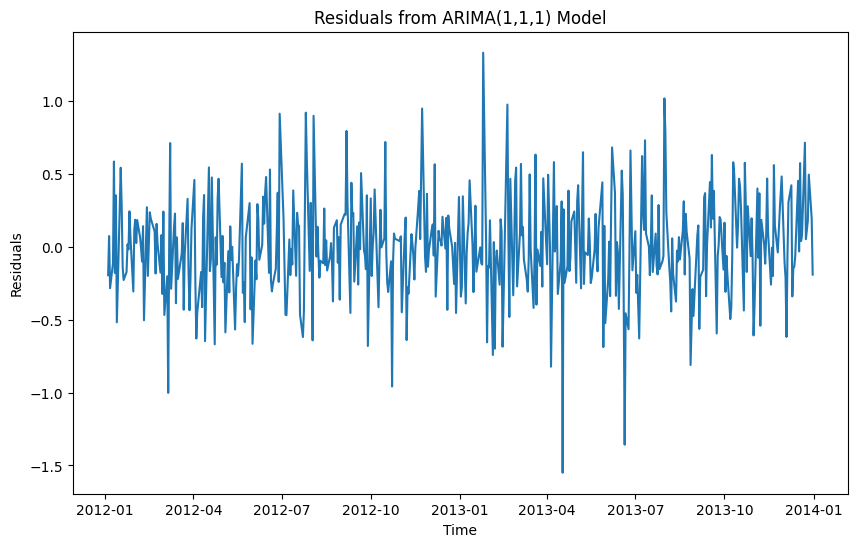

In [ ]:
residuals = fit_111.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals from ARIMA(1,1,1) Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

The residual plot look very similar to the actual TS plot after differencing which shows that there might be some dependencies still left to be captured.

### ACF & Ljung Box test

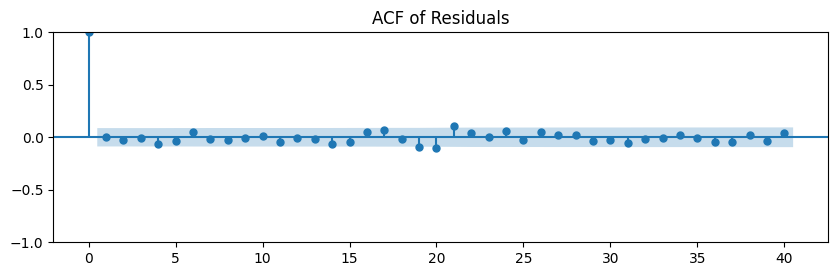

In [ ]:
# Assuming 'residuals' are obtained from the fitted ARIMA(1,1,1) model
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residuals, lags=40, ax=ax1)  # You can adjust the number of lags
ax1.set_title('ACF of Residuals')
plt.show()

In [ ]:
ljung_box_test_results = sm.stats.acorr_ljungbox(residuals, lags=[50], return_df=True)  # You can adjust the lags
print(ljung_box_test_results)

      lb_stat  lb_pvalue
50  55.274624   0.282259


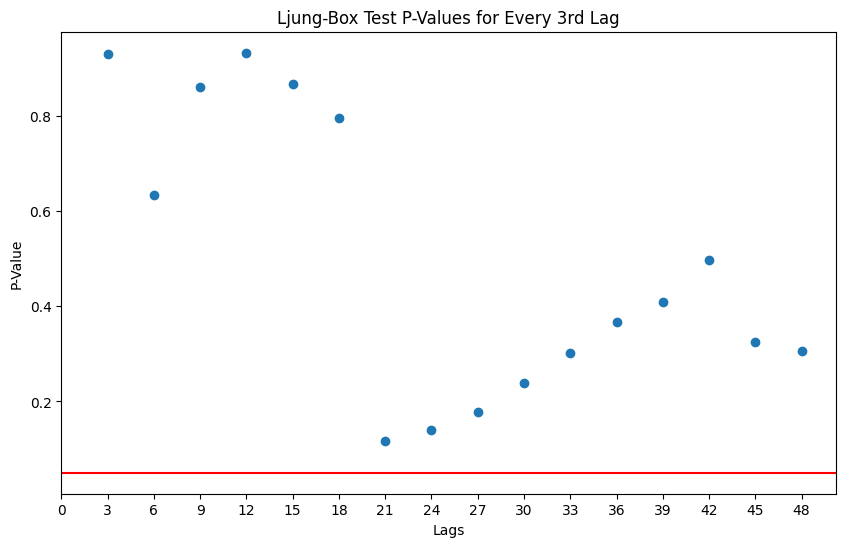

In [ ]:
lags = list(range(3, 51, 3))
ljung_box_result = sm.stats.acorr_ljungbox(residuals, lags=lags, return_df=True)
plt.figure(figsize=(10, 6))
plt.plot(ljung_box_result['lb_pvalue'], marker='o',linestyle='None')
plt.axhline(y=0.05, color='r', linestyle='-')  # Significance level line
plt.title('Ljung-Box Test P-Values for Every 3rd Lag')
plt.xticks(range(0, 51, 3))  # Set x-axis ticks to be the lags
plt.xlabel('Lags')
plt.ylabel('P-Value')
plt.show()

Looking at the ACF plot there doesn't seem to be any dependency left as none of the lags are significant.

To Confirm we performed the Ljung Box test, which clearly shows that we have no auto-corellation left as p values are above the significance level.

## Implementing the IMA(1,1)-GARCH model

We now implement a GARCH model on the residual of IMA(1,1) model to capture the remaining dependency/corelation, if any

Finding the best value of GARCH(p,q) p and q based on the AIC Value

In [ ]:
# Fit GARCH model
model_garch = arch_model(residuals, vol='Garch', p=1, q=1)  # You can adjust the GARCH parameters
results_garch = model_garch.fit()

# Output the summary of the GARCH model
print(results_garch.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1817.8286758798108
Iteration:      2,   Func. Count:     15,   Neg. LLF: 334.7893471608604
Iteration:      3,   Func. Count:     23,   Neg. LLF: 181.3821143063867
Iteration:      4,   Func. Count:     28,   Neg. LLF: 181.34787980249098
Iteration:      5,   Func. Count:     33,   Neg. LLF: 240.07710892006872
Iteration:      6,   Func. Count:     39,   Neg. LLF: 202.11520593356963
Iteration:      7,   Func. Count:     45,   Neg. LLF: 181.30224549608386
Iteration:      8,   Func. Count:     50,   Neg. LLF: 2320.812170748879
Iteration:      9,   Func. Count:     59,   Neg. LLF: 202.57128898138666
Iteration:     10,   Func. Count:     65,   Neg. LLF: 608.4288604407512
Iteration:     11,   Func. Count:     73,   Neg. LLF: 182.20225890318466
Iteration:     12,   Func. Count:     79,   Neg. LLF: 182.08287367404682
Iteration:     13,   Func. Count:     85,   Neg. LLF: 202.57145513559885
Iteration:     14,   Func. Count:     91,   Neg. LLF: 6

The best value of **(p,q)** are **(1,1)**

### Diagnotics of ARIMA-GARCH model

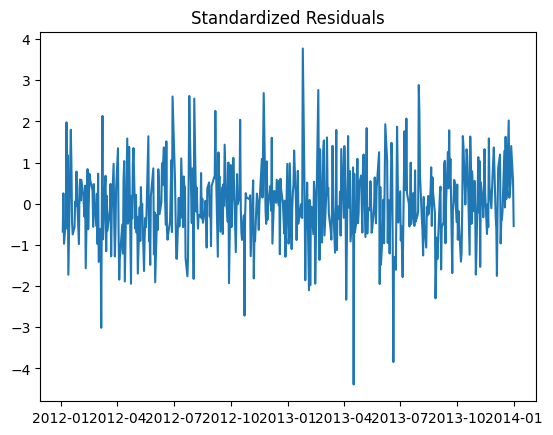

In [ ]:
std_resid = results_garch.std_resid
plt.plot(std_resid)
plt.title('Standardized Residuals')
plt.show()

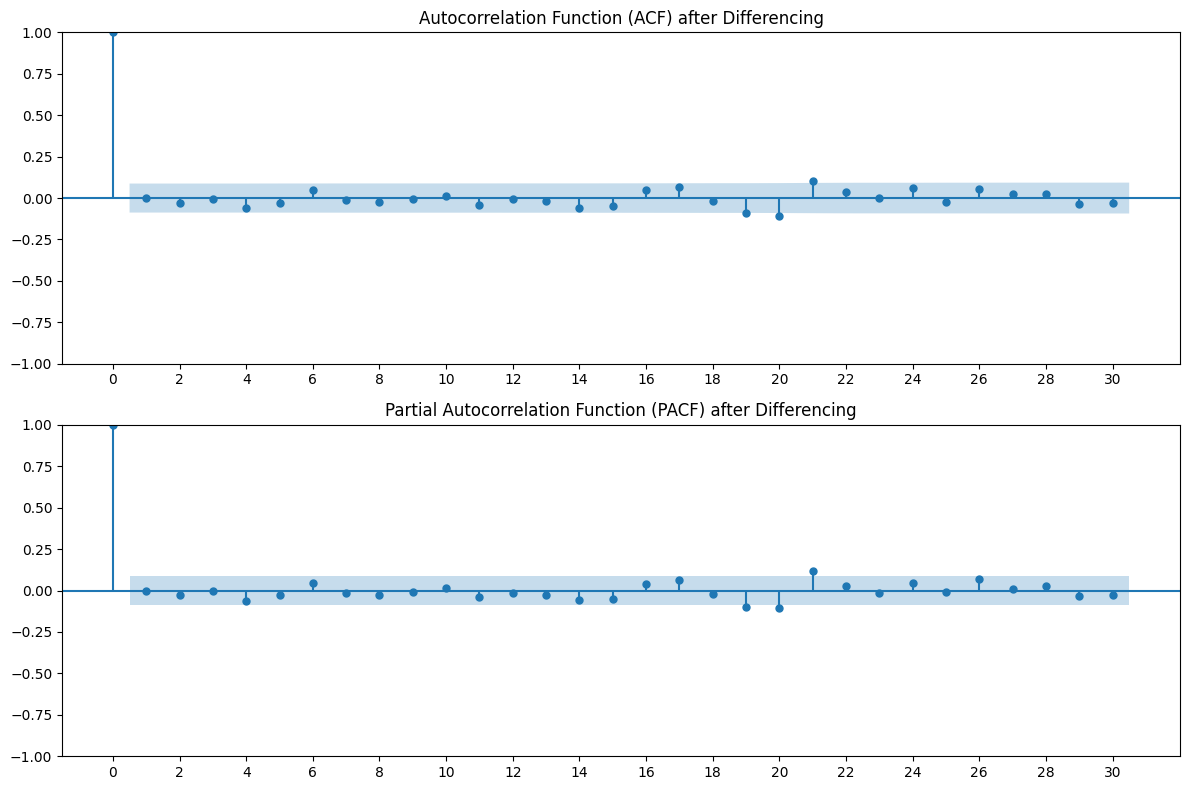

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
sm.graphics.tsa.plot_acf(std_resid, lags=30, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF) after Differencing')
ax1.set_xticks(range(0, 31, 2))
# PACF plot

sm.graphics.tsa.plot_pacf(std_resid, lags=30, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF) after Differencing')
ax2.set_xticks(range(0, 31, 2))
plt.tight_layout()
plt.show()

    lb_stat  lb_pvalue
10  4.50749   0.921564


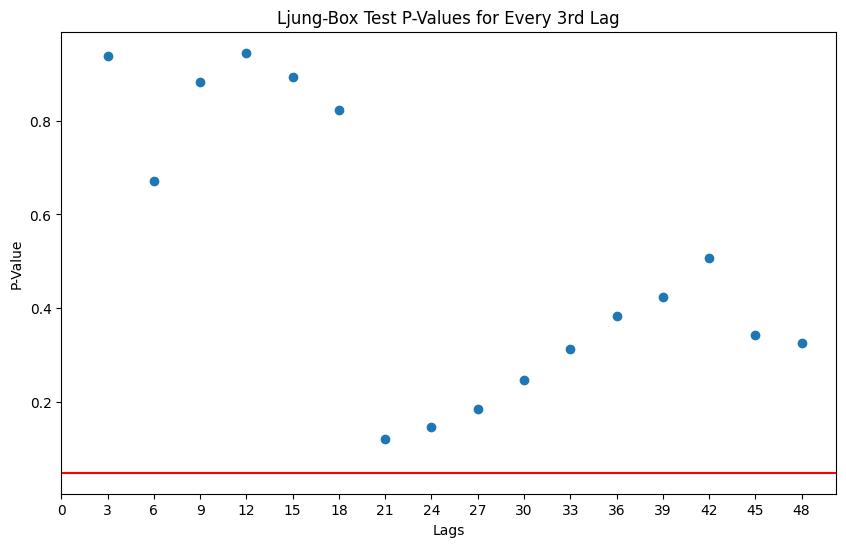

In [ ]:

ljung_box_result = acorr_ljungbox(std_resid, lags=[10], return_df=True)
print(ljung_box_result)
lags = list(range(3, 51, 3))
ljung_box_result = sm.stats.acorr_ljungbox(std_resid, lags=lags, return_df=True)
plt.figure(figsize=(10, 6))
plt.plot(ljung_box_result['lb_pvalue'], marker='o',linestyle='None')
plt.axhline(y=0.05, color='r', linestyle='-')  # Significance level line
plt.title('Ljung-Box Test P-Values for Every 3rd Lag')
plt.xticks(range(0, 51, 3))  # Set x-axis ticks to be the lags
plt.xlabel('Lags')
plt.ylabel('P-Value')
plt.show()

Even after applying GARCH model on top of ARIMA model with GARCH(1,1) there is no corellation visible

#### Check for Normality

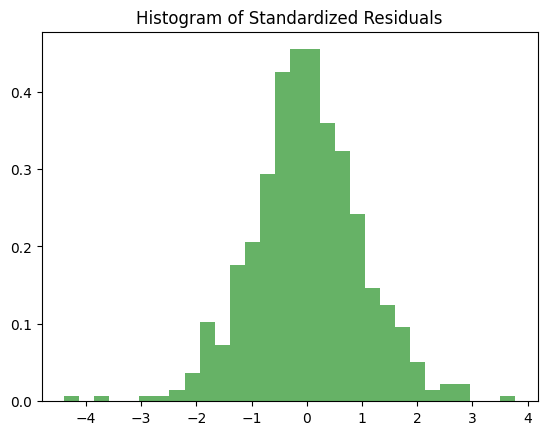

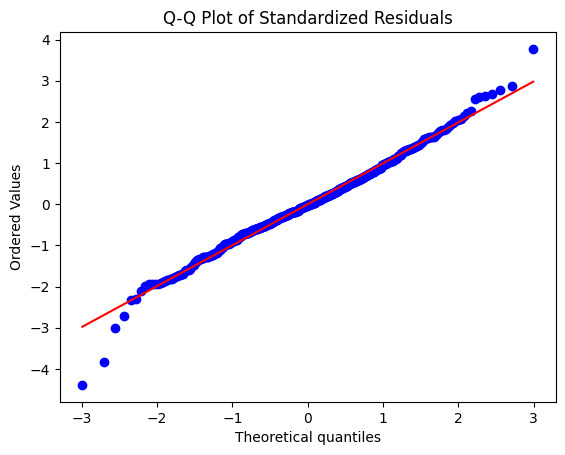

In [ ]:
# Histogram
plt.hist(std_resid, bins=30, density=True, alpha=0.6, color='g')
plt.title('Histogram of Standardized Residuals')
plt.show()

# Q-Q plot
stats.probplot(std_resid, dist="norm", plot=plt)
plt.title('Q-Q Plot of Standardized Residuals')
plt.show()

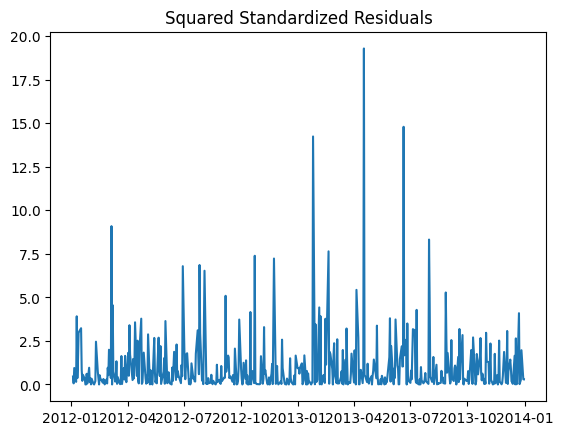

In [ ]:
plt.plot(std_resid**2)
plt.title('Squared Standardized Residuals')
plt.show()

In [ ]:
# Assuming 'residuals' is your data
shapiro_test = stats.shapiro(std_resid)

# The test returns a tuple consisting of the test statistic and the p-value
shapiro_statistic, shapiro_pvalue = shapiro_test

print("Shapiro-Wilk Test Statistic:", shapiro_statistic)
print("Shapiro-Wilk Test P-Value:", shapiro_pvalue)

# Interpretation of p-value
alpha = 0.05
if shapiro_pvalue >alpha:
    print("The data appears to be normally distributed (fail to reject H0)")
else:
    print("The data does not appear to be normally distributed (reject H0)")

Shapiro-Wilk Test Statistic: 0.9892352223396301
Shapiro-Wilk Test P-Value: 0.000974588911049068
The data does not appear to be normally distributed (reject H0)


## Forecasting using the ARIMA-GARCH model

In [ ]:
# ARIMA Forecast
n_forecast = 60 # Next 60 days
arima_forecast = fit_111.get_forecast(steps=n_forecast)
predicted_means = arima_forecast.predicted_mean
last_original_value = closing_price.iloc[-1]
undifferenced_forecast = predicted_means.cumsum() + last_original_value
# GARCH Forecast (Volatility)
garch_forecast = results_garch.forecast(horizon=n_forecast)
predicted_volatility = garch_forecast.variance.iloc[-1]
predicted_volatility.reset_index(drop=True)
predicted_volatility.index = undifferenced_forecast.index

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


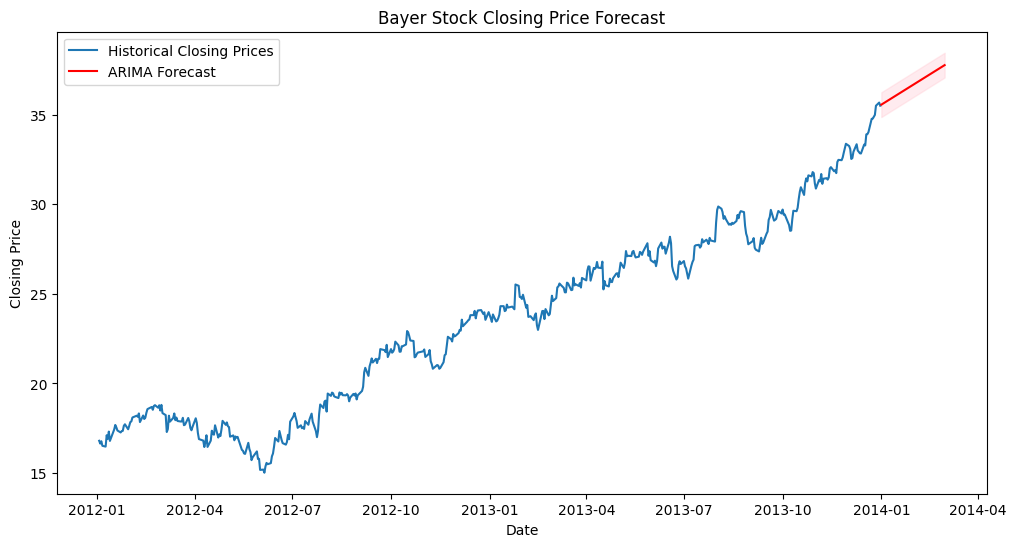

In [ ]:
# Create a date range for the forecasts
last_date = closing_price.index[-1]
forecast_index = pd.date_range(start=last_date, periods=n_forecast + 1, inclusive='right',freq='D')

# Plot the historical data
plt.figure(figsize=(12, 6))
plt.plot(closing_price, label='Historical Closing Prices')
# Plot the ARIMA forecasts
plt.plot(forecast_index, undifferenced_forecast, color='red', label='ARIMA Forecast')

# Plot the GARCH forecasted volatility as a confidence interval
upper_bound = undifferenced_forecast + 1.96 * np.sqrt(predicted_volatility)
lower_bound = undifferenced_forecast - 1.96 * np.sqrt(predicted_volatility)

# Ensure that the lengths match

plt.fill_between(forecast_index, lower_bound, upper_bound, color='pink', alpha=0.3)

plt.title('Bayer Stock Closing Price Forecast')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

After doing the undifferencing, the forecasted values look quite promising and can be improved with more factor consideration.

## GARCH Model

Now We will Be trying with a pure GARCH Model as the original data has a near constant mean with variance. Let try to capture those using a pure GARCH model. We will be applying the GARCH to the data after first difference as that is a stationary data.


In [ ]:
model_garch = arch_model(first_order_diff, mean='Zero', vol='Garch', p=1, q=2)
results_garch = model_garch.fit()

print(results_garch.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1725.8394398363207
Iteration:      2,   Func. Count:     15,   Neg. LLF: 187.25807814231084
Iteration:      3,   Func. Count:     20,   Neg. LLF: 187.1749623289744
Iteration:      4,   Func. Count:     25,   Neg. LLF: 188.92725352805314
Iteration:      5,   Func. Count:     31,   Neg. LLF: 187.1088759618002
Iteration:      6,   Func. Count:     36,   Neg. LLF: 188.92582828728573
Iteration:      7,   Func. Count:     42,   Neg. LLF: 187.5246159264653
Iteration:      8,   Func. Count:     48,   Neg. LLF: 1698.7434867085888
Iteration:      9,   Func. Count:     59,   Neg. LLF: 187.74782700803135
Iteration:     10,   Func. Count:     65,   Neg. LLF: 187.77587155372697
Iteration:     11,   Func. Count:     71,   Neg. LLF: 187.756658330782
Iteration:     12,   Func. Count:     77,   Neg. LLF: 188.0763065660394
Iteration:     13,   Func. Count:     83,   Neg. LLF: 2870.5755068267113
Iteration:     14,   Func. Count:     91,   Neg. LLF: 200

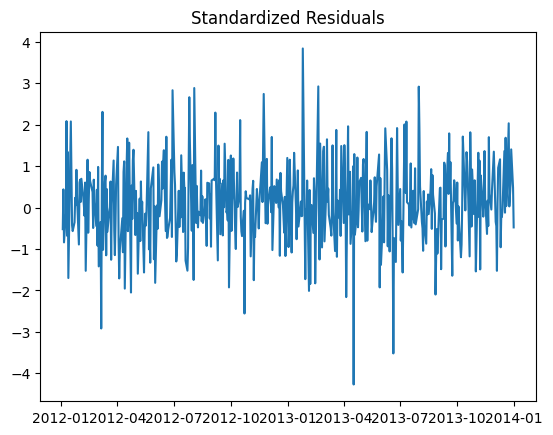

In [ ]:
std_resid = results_garch.std_resid
plt.plot(std_resid)
plt.title('Standardized Residuals')
plt.show()

      lb_stat  lb_pvalue
30  40.201974   0.101011


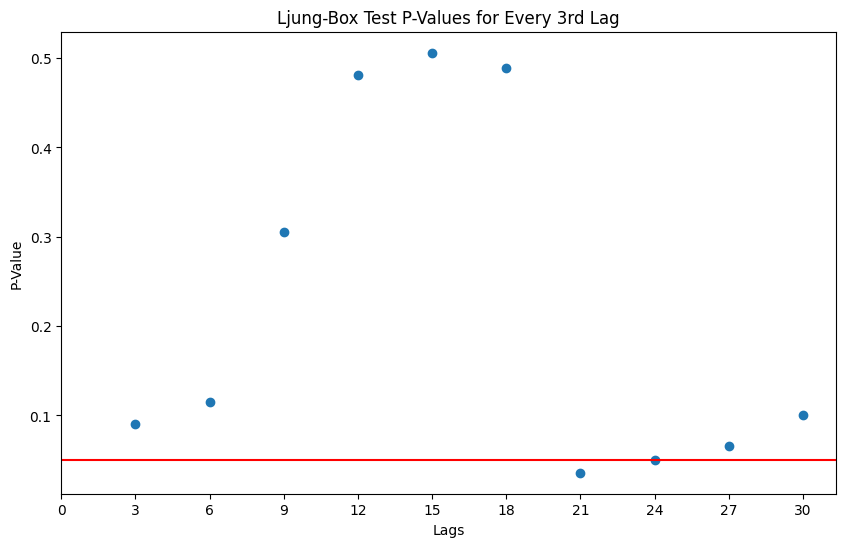

In [ ]:
ljung_box_result = acorr_ljungbox(std_resid, lags=[30], return_df=True)
print(ljung_box_result)
lags = list(range(3, 31, 3))
ljung_box_result = sm.stats.acorr_ljungbox(std_resid, lags=lags, return_df=True)
plt.figure(figsize=(10, 6))
plt.plot(ljung_box_result['lb_pvalue'], marker='o',linestyle='None')
plt.axhline(y=0.05, color='r', linestyle='-')  # Significance level line
plt.title('Ljung-Box Test P-Values for Every 3rd Lag')
plt.xticks(range(0, 31, 3))  # Set x-axis ticks to be the lags
plt.xlabel('Lags')
plt.ylabel('P-Value')
plt.show()

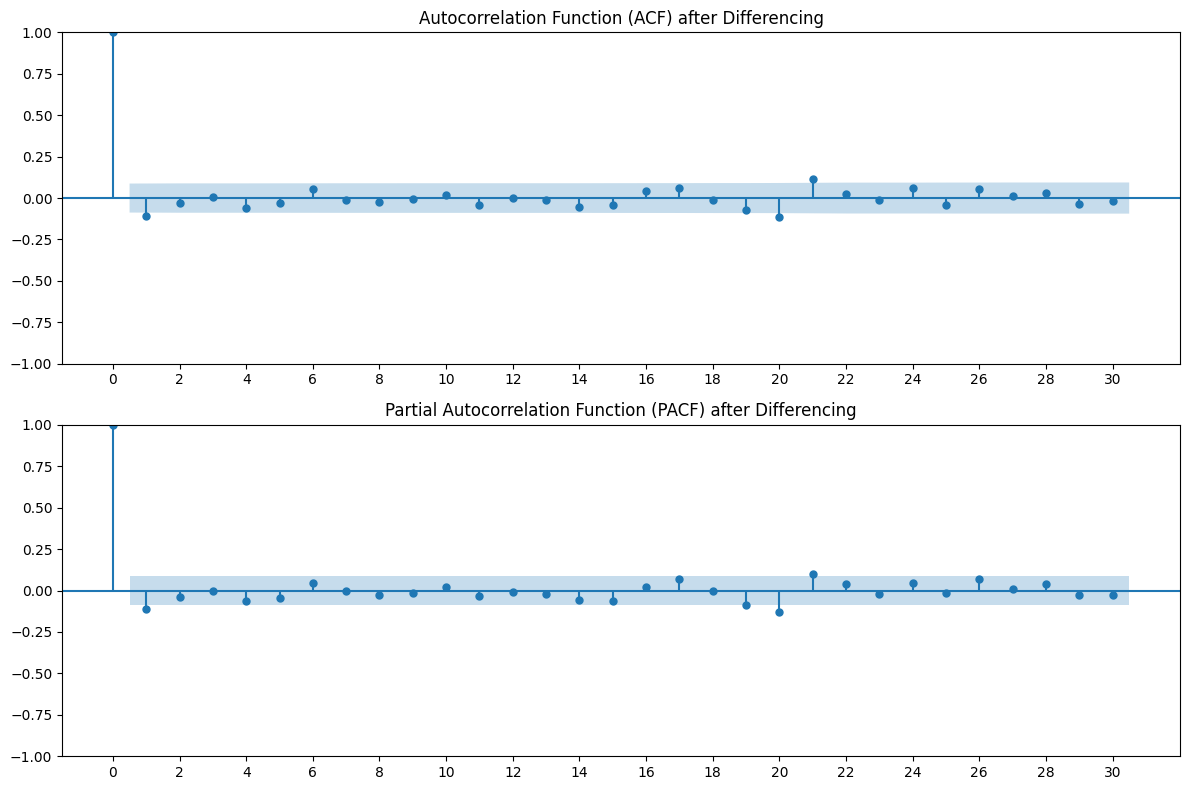

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
sm.graphics.tsa.plot_acf(std_resid, lags=30, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF) after Differencing')
ax1.set_xticks(range(0, 31, 2))
# PACF plot

sm.graphics.tsa.plot_pacf(std_resid, lags=30, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF) after Differencing')
ax2.set_xticks(range(0, 31, 2))
plt.tight_layout()
plt.show()

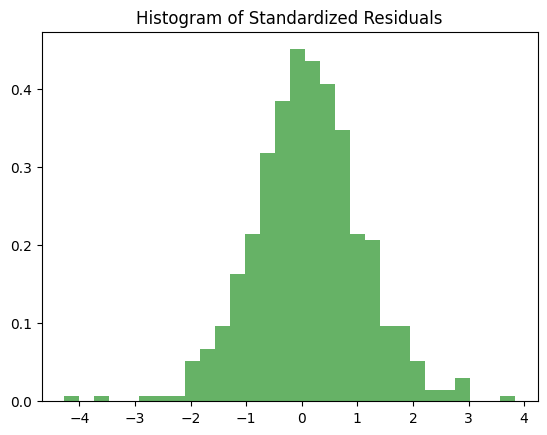

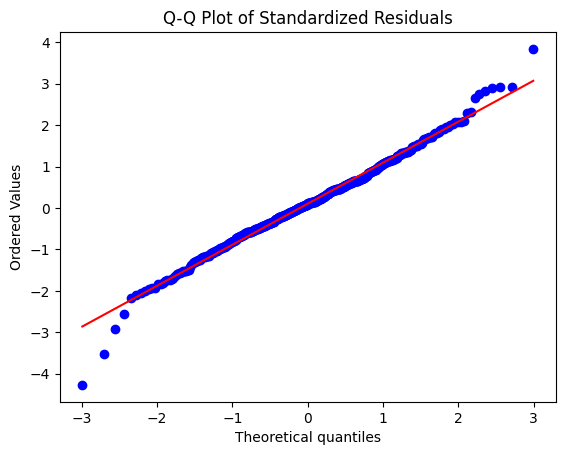

In [ ]:
# Histogram
plt.hist(std_resid, bins=30, density=True, alpha=0.6, color='g')
plt.title('Histogram of Standardized Residuals')
plt.show()

# Q-Q plot
stats.probplot(std_resid, dist="norm", plot=plt)
plt.title('Q-Q Plot of Standardized Residuals')
plt.show()

In [ ]:
# Assuming 'residuals' is your data
shapiro_test = stats.shapiro(std_resid)

# The test returns a tuple consisting of the test statistic and the p-value
shapiro_statistic, shapiro_pvalue = shapiro_test

print("Shapiro-Wilk Test Statistic:", shapiro_statistic)
print("Shapiro-Wilk Test P-Value:", shapiro_pvalue)

# Interpretation of p-value
alpha = 0.05
if shapiro_pvalue >alpha:
    print("The data appears to be normally distributed (fail to reject H0)")
else:
    print("The data does not appear to be normally distributed (reject H0)")

Shapiro-Wilk Test Statistic: 0.9903342723846436
Shapiro-Wilk Test P-Value: 0.002262952271848917
The data does not appear to be normally distributed (reject H0)


Since GARCH model is giving me a worse AIC score then The IMA model so we will not be forecasting using it.

# Seasonal Data

## Reading Data

In [ ]:
pollution = pd.read_csv('pollution_us_2000_2016.csv')
pollution_1 = pollution[['Date Local', 'NO2 Mean']]
print(pollution_1)

         Date Local   NO2 Mean
0        2000-01-01  19.041667
1        2000-01-01  19.041667
2        2000-01-01  19.041667
3        2000-01-01  19.041667
4        2000-01-02  22.958333
...             ...        ...
1746656  2016-03-30   1.083333
1746657  2016-03-31   0.939130
1746658  2016-03-31   0.939130
1746659  2016-03-31   0.939130
1746660  2016-03-31   0.939130

[1746661 rows x 2 columns]


## Plots



### Time series data

<ipython-input-389-551f5683edad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pollution_1['Date Local'] = pd.to_datetime(pollution_1['Date Local'])
<ipython-input-389-551f5683edad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pollution_1['NO2 Mean'] = pd.to_numeric(pollution_1['NO2 Mean'], errors='coerce')


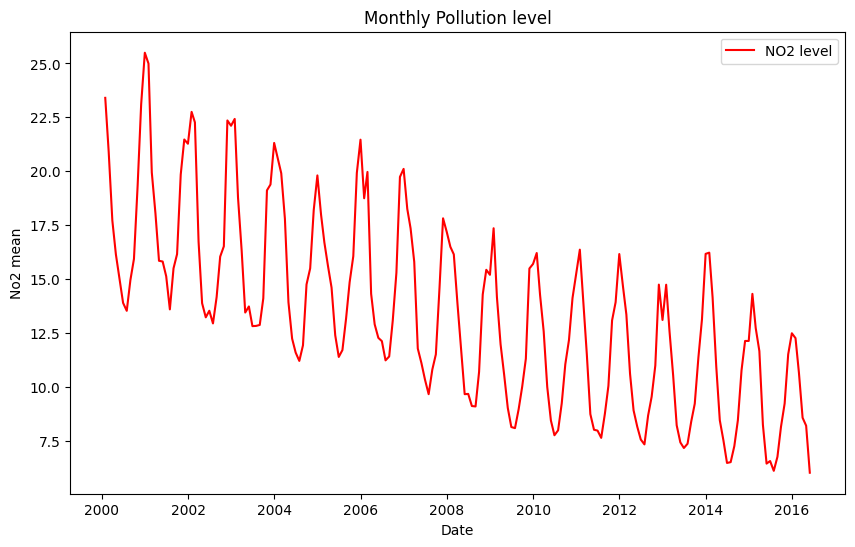

In [ ]:
pollution_1['Date Local'] = pd.to_datetime(pollution_1['Date Local'])
pollution_1['NO2 Mean'] = pd.to_numeric(pollution_1['NO2 Mean'], errors='coerce')
sorted_df = pollution_1.sort_values(by='Date Local')
sorted_df.set_index('Date Local',inplace = True)
#Plotting the time series plot

pollution_monthly = sorted_df['NO2 Mean'].resample('M').mean()
plt.figure(figsize=(10, 6))
plt.plot(pollution_monthly.index, pollution_monthly, label='NO2 level', color='Red')
plt.title('Monthly Pollution level')
plt.xlabel('Date')
plt.ylabel('No2 mean')
plt.legend()
plt.show()

The TS plot clearly shows a monthly seasonality

### ACF and PACF plot

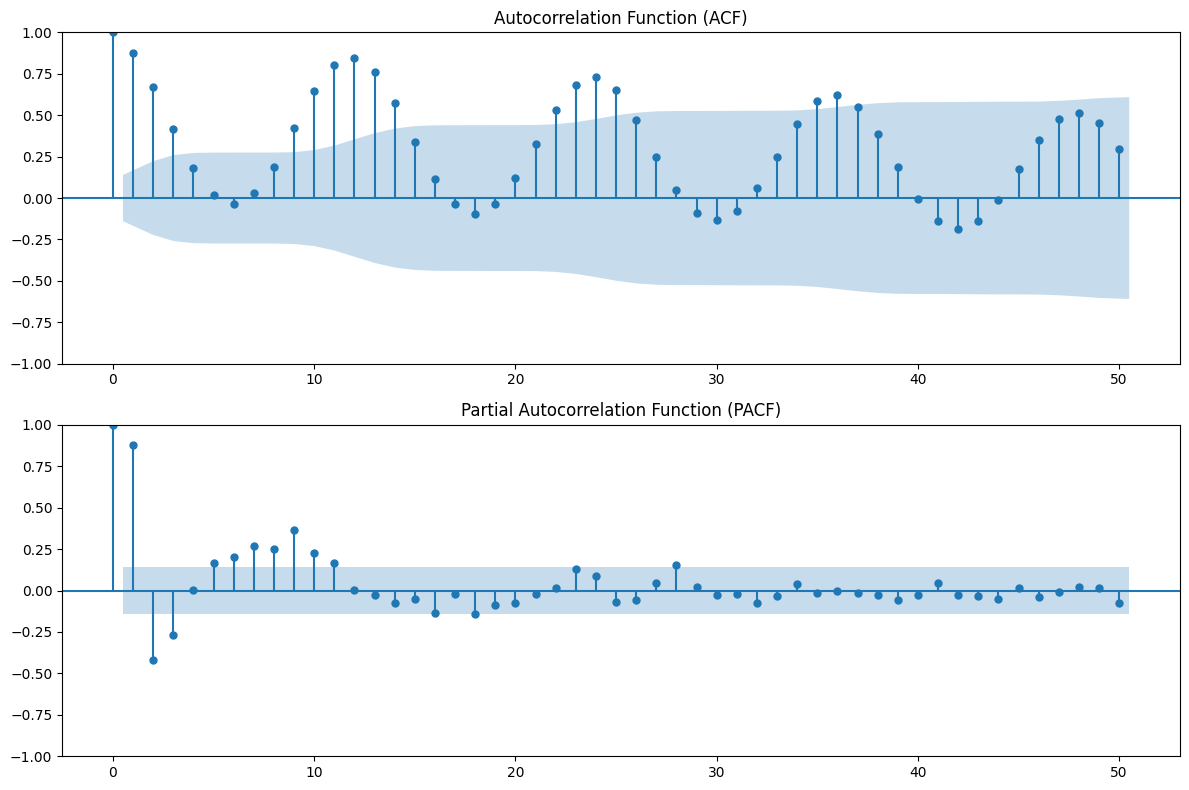

In [ ]:
# Now Plotting the ACF plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
sm.graphics.tsa.plot_acf(pollution_monthly, lags=50, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

# PACF plot

sm.graphics.tsa.plot_pacf(pollution_monthly, lags=50, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

The ACF and PACF also has strong inference towards seasonality with lags of 11

## ADF test to check for Stationarity

In [ ]:
result = adfuller(pollution_monthly)

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -0.6543982066290503
p-value: 0.8582105971888514
Critical Values:
   1%: -3.467004502498507
   5%: -2.8776444997243558
   10%: -2.575355189707274


From ADF test we can clearly say that the given time series is not stationary as the p-value >0.05 i.e we reject the null hypothesis.

H_0 = The Time Series is statonary

H_1 = Time Series is not stationary

## Differencing

First Performing a non seasonal General Differencing

In [ ]:
first_order_diff_update = pollution_monthly.diff().dropna()

In [ ]:
result = adfuller(first_order_diff_update)

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -3.8655625784759775
p-value: 0.002303424032915518
Critical Values:
   1%: -3.467004502498507
   5%: -2.8776444997243558
   10%: -2.575355189707274


It is stationary now

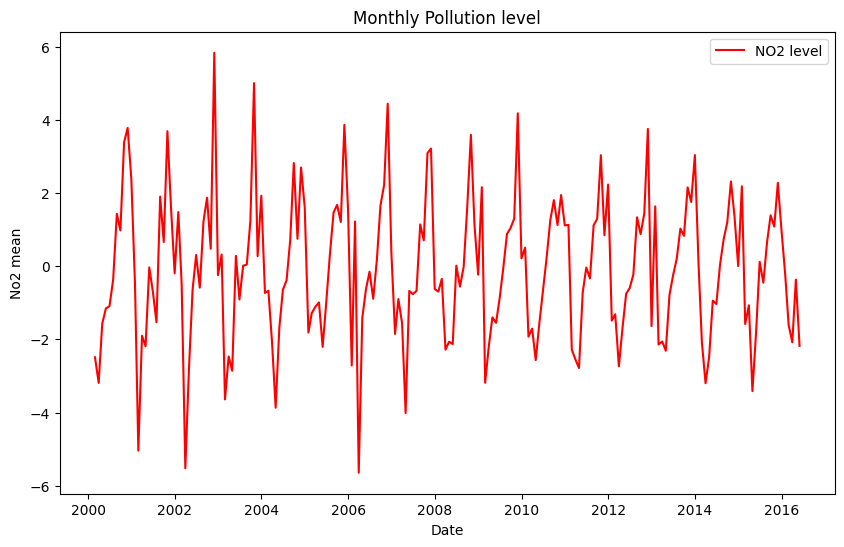

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(first_order_diff_update.index, first_order_diff_update, label='NO2 level', color='Red')
plt.title('Monthly Pollution level')
plt.xlabel('Date')
plt.ylabel('No2 mean')
plt.legend()
plt.show()

The time series also looks like it has a constant mean now.

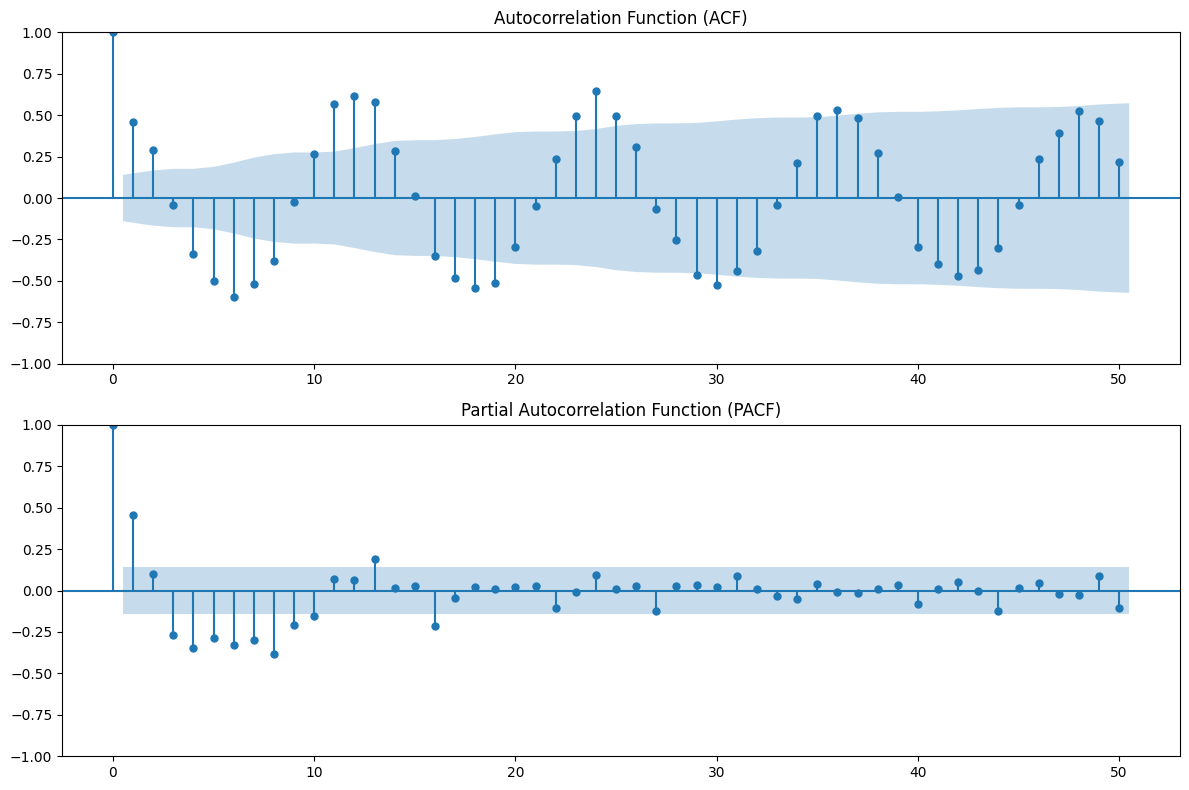

In [ ]:
# Now Plotting the ACF plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
sm.graphics.tsa.plot_acf(first_order_diff_update, lags=50, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

# PACF plot

sm.graphics.tsa.plot_pacf(first_order_diff_update, lags=50, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

THE ACF and PACF plot clearly shows that there is seasonality with season 12

The SARIMA models which are possible according to the ACF and PACF plot are:



1.   SARIMA(0,1,0)(0,0,2)$_{S = 12}$
2.   SARIMA(0,1,0)(1,0,2)$_{s = 12}$
3.   SARIMA(1,1,1)(1,0,2)$_{s = 12}$
4.   SARIMA(1,1,1)(0,0,2)$_{s = 12}$


## 1.   SARIMA(0,1,0)(0,0,2)$_{S = 12}$


In [ ]:
model_results = []

In [ ]:
model = SARIMAX(first_order_diff_update, order=(0, 0, 0), seasonal_order=(0, 0, 2, 12))  # 12 for monthly data, adjust if different
results = model.fit()
model_results.append({'Model': 'SARIMA(0,1,0)(0,0,2)', 'AIC': results.aic})
print(results.summary())

                                   SARIMAX Results                                   
Dep. Variable:                      NO2 Mean   No. Observations:                  196
Model:             SARIMAX(0, 0, [1, 2], 12)   Log Likelihood                -361.279
Date:                       Mon, 18 Dec 2023   AIC                            728.557
Time:                               03:53:13   BIC                            738.392
Sample:                           02-29-2000   HQIC                           732.539
                                - 05-31-2016                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12       0.4225      0.066      6.402      0.000       0.293       0.552
ma.S.L24       0.4380      0.069      6.326      0.000       0.302       0.

## 2. SARIMA(0,1,0)(1,0,2)$_{s = 12}$


In [ ]:
model = SARIMAX(first_order_diff_update, order=(0, 0, 0), seasonal_order=(1, 0, 2, 12))  # 12 for monthly data, adjust if different
results = model.fit()
model_results.append({'Model': 'SARIMA(0,1,0)(1,0,2)', 'AIC': results.aic})
print(results.summary())

                                   SARIMAX Results                                   
Dep. Variable:                      NO2 Mean   No. Observations:                  196
Model:             SARIMAX(1, 0, [1, 2], 12)   Log Likelihood                -314.490
Date:                       Mon, 18 Dec 2023   AIC                            636.980
Time:                               03:53:14   BIC                            650.092
Sample:                           02-29-2000   HQIC                           642.288
                                - 05-31-2016                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9985      0.004    247.482      0.000       0.991       1.006
ma.S.L12      -1.0339      0.102    -10.147      0.000      -1.234      -0.

## 3. SARIMA(1,1,1)(1,0,2)$_{s = 12}$


In [ ]:
model = SARIMAX(first_order_diff_update, order=(1, 0, 1), seasonal_order=(1, 0, 2, 12))  # 12 for monthly data, adjust if different
results = model.fit()
model_results.append({'Model': 'SARIMA(1,1,1)(1,0,2)', 'AIC': results.aic})
print(results.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                NO2 Mean   No. Observations:                  196
Model:             SARIMAX(1, 0, 1)x(1, 0, [1, 2], 12)   Log Likelihood                -284.568
Date:                                 Mon, 18 Dec 2023   AIC                            581.136
Time:                                         03:53:16   BIC                            600.805
Sample:                                     02-29-2000   HQIC                           589.099
                                          - 05-31-2016                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3063      0.073      4.213      0.000       0.164       0

## 4. SARIMA(1,1,1)(0,0,2)$_{s = 12}$

In [ ]:
model = SARIMAX(first_order_diff_update, order=(1, 0, 1), seasonal_order=(0, 0, 2, 12))  # 12 for monthly data, adjust if different
results = model.fit()
model_results.append({'Model': 'SARIMA(1,1,1)(0,0,2)', 'AIC': results.aic})
print(results.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                NO2 Mean   No. Observations:                  196
Model:             SARIMAX(1, 0, 1)x(0, 0, [1, 2], 12)   Log Likelihood                -360.731
Date:                                 Mon, 18 Dec 2023   AIC                            731.462
Time:                                         03:53:17   BIC                            747.853
Sample:                                     02-29-2000   HQIC                           738.098
                                          - 05-31-2016                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3694      0.705      0.524      0.600      -1.012       1

In [ ]:
results_df = pd.DataFrame(model_results)
sorted_results_df = results_df.sort_values(by='AIC')
print(sorted_results_df)

                  Model         AIC
2  SARIMA(1,1,1)(1,0,2)  581.136290
1  SARIMA(0,1,0)(1,0,2)  636.979669
0  SARIMA(0,1,0)(0,0,2)  728.557250
3  SARIMA(1,1,1)(0,0,2)  731.462165


It is very clear that the SARIMA(1,1,1)(1,0,2)  works very good for our Data set. We are gonna use this to Forecast our future data




## Diagnostic

### Residual analysis

In [ ]:
model = SARIMAX(first_order_diff_update, order=(1, 0, 1), seasonal_order=(1, 0, 2, 12))  # 12 for monthly data, adjust if different
results = model.fit()

Text(0, 0.5, 'Residuals')

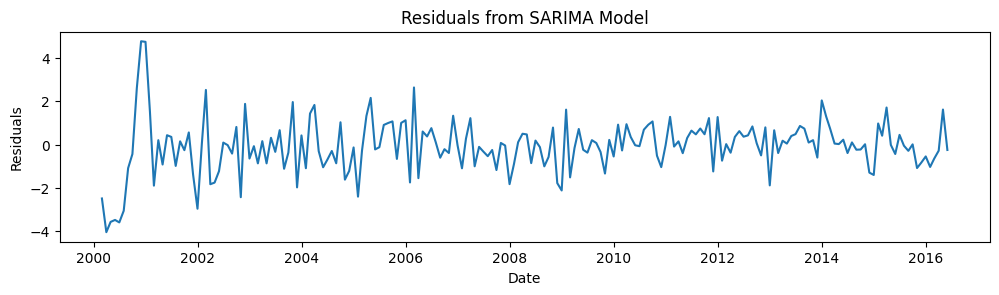

In [ ]:
residuals = results.resid
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(residuals)
plt.title('Residuals from SARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')

### ACF & PACF & Ljung Box Test

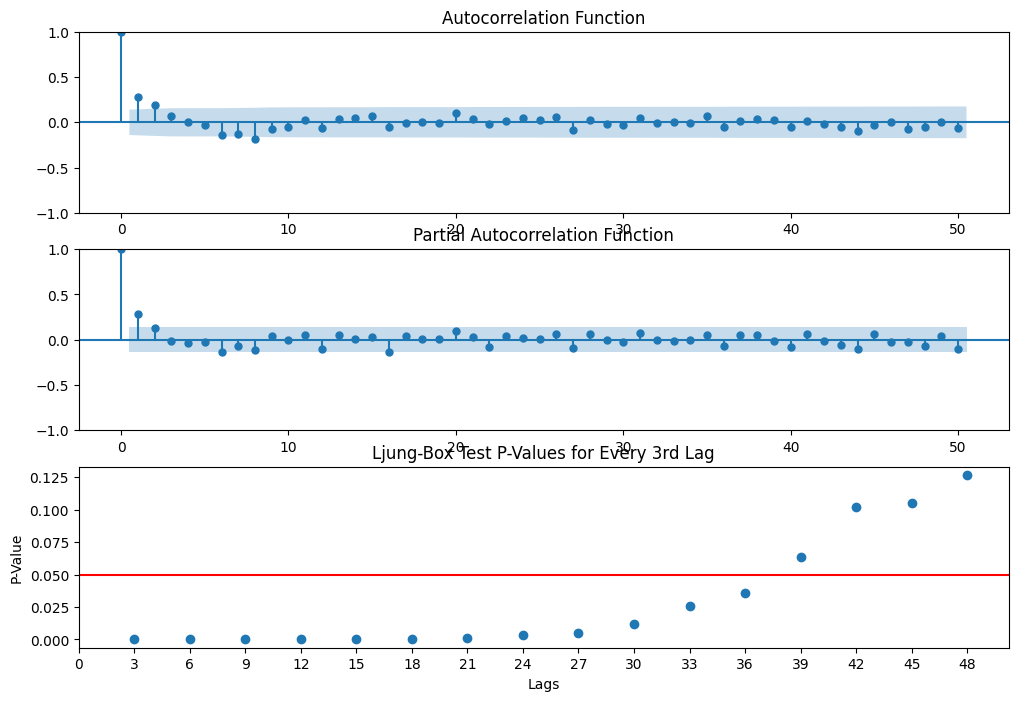

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 8))

# Plot ACF
plt.subplot(311)
plot_acf(residuals, ax=plt.gca(), lags=50)
plt.title('Autocorrelation Function')

# Plot PACF
plt.subplot(312)
plot_pacf(residuals, ax=plt.gca(), lags=50)
plt.title('Partial Autocorrelation Function')

lags = list(range(3, 51, 3))
ljung_box_result = sm.stats.acorr_ljungbox(residuals, lags=lags, return_df=True)
plt.subplot(313)
plt.plot(ljung_box_result['lb_pvalue'], marker='o',linestyle='None')
plt.axhline(y=0.05, color='r', linestyle='-')  # Significance level line
plt.title('Ljung-Box Test P-Values for Every 3rd Lag')
plt.xticks(range(0, 51, 3))  # Set x-axis ticks to be the lags
plt.xlabel('Lags')
plt.ylabel('P-Value')
plt.show()
plt.tight_layout()  # Adjusts the plots to fit in the figure area
plt.show()

The Ljung box test clearly shows that there are still some dependencies that needs to be taken care of as the p values are below the significant line. Will Perform GARCH model to take care of the dependency

## SARIMA GARCH Model

In [ ]:
garch_model = arch_model(residuals, vol='Garch', p=1, q=1)
garch_results = garch_model.fit(update_freq=10)
print(garch_results.summary())

Iteration:     10,   Func. Count:     59,   Neg. LLF: 284.10310950261436
Optimization terminated successfully    (Exit mode 0)
            Current function value: 284.1001521045569
            Iterations: 15
            Function evaluations: 83
            Gradient evaluations: 15
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -284.100
Distribution:                  Normal   AIC:                           576.200
Method:            Maximum Likelihood   BIC:                           589.313
                                        No. Observations:                  196
Date:                Mon, Dec 18 2023   Df Residuals:                      195
Time:                        03:53:25   Df Model:                            1
       

The AIC score improved after the GARCH model application

In [ ]:
std_resid = garch_results.std_resid

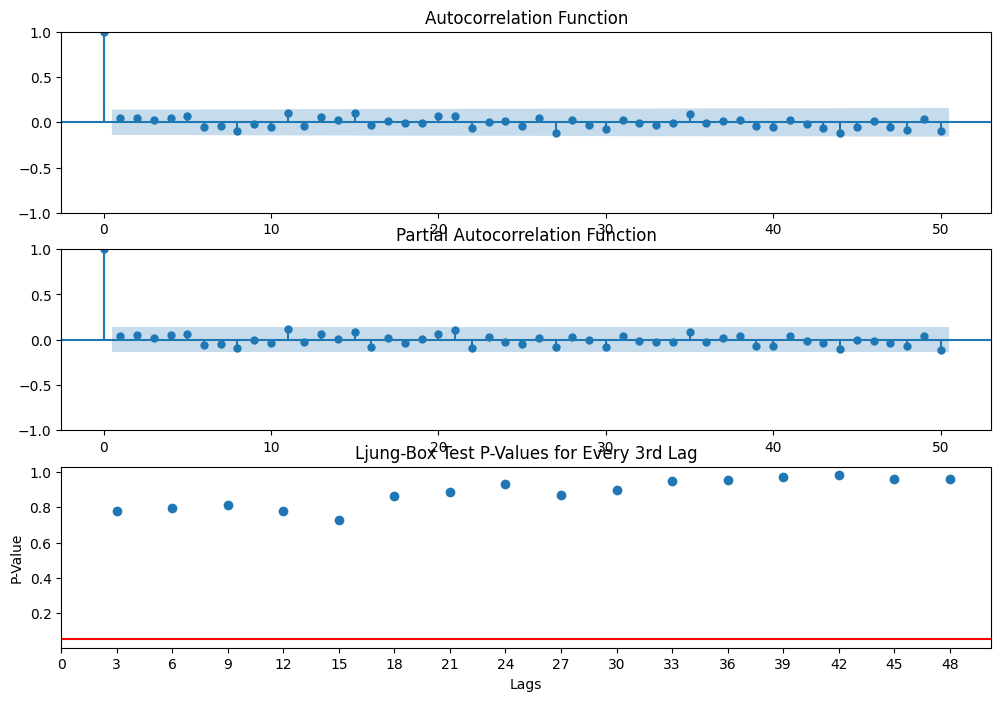

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 8))

# Plot ACF
plt.subplot(311)
plot_acf(std_resid, ax=plt.gca(), lags=50)
plt.title('Autocorrelation Function')

# Plot PACF
plt.subplot(312)
plot_pacf(std_resid, ax=plt.gca(), lags=50)
plt.title('Partial Autocorrelation Function')

lags = list(range(3, 51, 3))
ljung_box_result = sm.stats.acorr_ljungbox(std_resid, lags=lags, return_df=True)
plt.subplot(313)
plt.plot(ljung_box_result['lb_pvalue'], marker='o',linestyle='None')
plt.axhline(y=0.05, color='r', linestyle='-')  # Significance level line
plt.title('Ljung-Box Test P-Values for Every 3rd Lag')
plt.xticks(range(0, 51, 3))  # Set x-axis ticks to be the lags
plt.xlabel('Lags')
plt.ylabel('P-Value')
plt.show()
plt.tight_layout()  # Adjusts the plots to fit in the figure area
plt.show()

This clearly shows that all the Dependency in the data is captured now and both the ACF, PACF and Ljung box test verifies it.

## Normality check

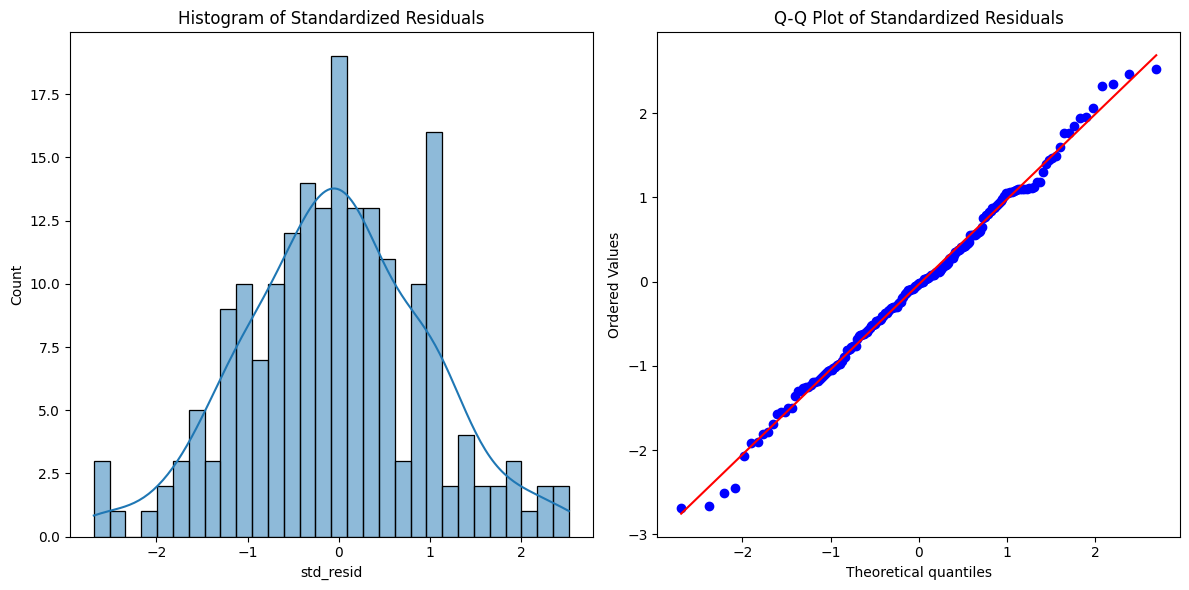

In [ ]:
# Histogram
plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.histplot(std_resid, kde=True, bins=30)
plt.title('Histogram of Standardized Residuals')

# Q-Q plot
plt.subplot(122)
stats.probplot(std_resid, dist="norm", plot=plt)
plt.title('Q-Q Plot of Standardized Residuals')

plt.tight_layout()
plt.show()

In [ ]:
# Assuming 'residuals' is your data
shapiro_test = stats.shapiro(std_resid)

# The test returns a tuple consisting of the test statistic and the p-value
shapiro_statistic, shapiro_pvalue = shapiro_test

print("Shapiro-Wilk Test Statistic:", shapiro_statistic)
print("Shapiro-Wilk Test P-Value:", shapiro_pvalue)

# Interpretation of p-value
alpha = 0.05
if shapiro_pvalue >alpha:
    print("The data appears to be normally distributed (fail to reject H0)")
else:
    print("The data does not appear to be normally distributed (reject H0)")

Shapiro-Wilk Test Statistic: 0.994377613067627
Shapiro-Wilk Test P-Value: 0.6716574430465698
The data appears to be normally distributed (fail to reject H0)


## Forecasting

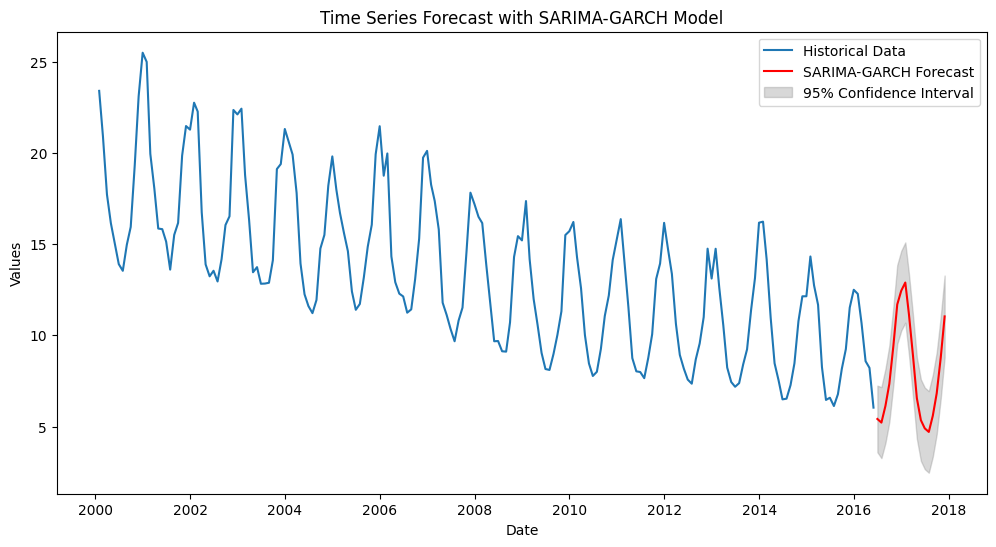

In [ ]:
n_forecast = 18  # For example, forecast 18 periods into the future
sarima_forecast = results.get_forecast(steps=n_forecast)
forecast_mean = sarima_forecast.predicted_mean
last_original_value = pollution_monthly.iloc[-1]
undifferenced_forecast = forecast_mean.cumsum() + last_original_value
garch_forecast = garch_results.forecast(horizon=n_forecast)
forecast_volatility = garch_forecast.variance.iloc[-1]**0.5  # Taking square root for standard deviation
forecast_volatility.reset_index(drop=True)
forecast_volatility.index=undifferenced_forecast.index
forecast_index = pd.date_range(start=pollution_monthly.index[-1], periods=n_forecast+1, inclusive='right',freq='M')
upper_bound = undifferenced_forecast + (1.96 * forecast_volatility)  # 95% CI
lower_bound = undifferenced_forecast - (1.96 * forecast_volatility)

plt.figure(figsize=(12, 6))

# Plot original time series data
plt.plot(pollution_monthly, label='Historical Data')

# Plot the SARIMA forecasted mean
plt.plot(forecast_index, undifferenced_forecast, label='SARIMA-GARCH Forecast', color='red')

# Plot the forecasted volatility as a confidence interval around the mean
plt.fill_between(forecast_index, lower_bound, upper_bound, color='gray', alpha=0.3, label='95% Confidence Interval')

plt.title('Time Series Forecast with SARIMA-GARCH Model')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

The forecasted data quite good

In [ ]:
!jupyter nbconvert --to html /content/Time_Series_Project.ipynb

[NbConvertApp] Converting notebook /content/Time_Series_Project.ipynb to html
[NbConvertApp] Writing 2411531 bytes to /content/Time_Series_Project.html


In [ ]:
!jupyter nbconvert --to pdf /content/Time_Series_Project.ipynb

[NbConvertApp] Converting notebook /content/Time_Series_Project.ipynb to pdf
[NbConvertApp] Support files will be in Time_Series_Project_files/
[NbConvertApp] Making directory ./Time_Series_Project_files
[NbConvertApp] Making directory ./Time_Series_Project_files
[NbConvertApp] Making directory ./Time_Series_Project_files
[NbConvertApp] Making directory ./Time_Series_Project_files
[NbConvertApp] Making directory ./Time_Series_Project_files
[NbConvertApp] Making directory ./Time_Series_Project_files
[NbConvertApp] Making directory ./Time_Series_Project_files
[NbConvertApp] Making directory ./Time_Series_Project_files
[NbConvertApp] Making directory ./Time_Series_Project_files
[NbConvertApp] Making directory ./Time_Series_Project_files
[NbConvertApp] Making directory ./Time_Series_Project_files
[NbConvertApp] Making directory ./Time_Series_Project_files
[NbConvertApp] Making directory ./Time_Series_Project_files
[NbConvertApp] Making directory ./Time_Series_Project_files
[NbConvertApp] M

In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1
  libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby
  ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-java
  libcommons-logging-java-doc libexcalibu